In [57]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

## First Dataset Blobs(r_s = 22)

In [58]:
X, y = make_blobs(n_samples=300, random_state=22)

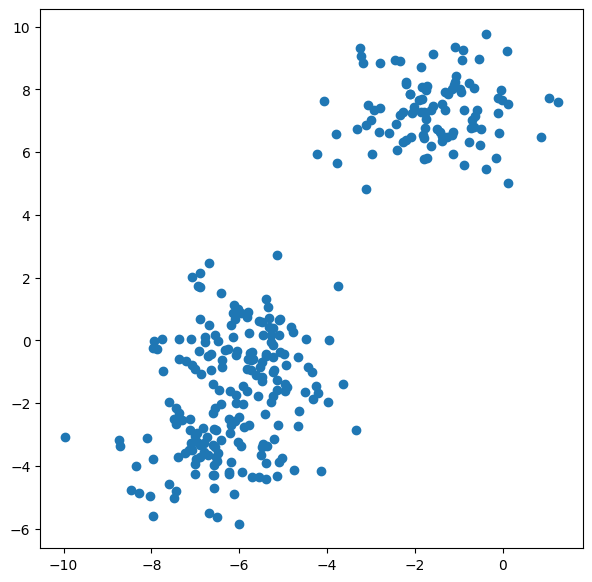

In [59]:
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1])

### K-Means++

In [60]:
from sklearn.cluster import KMeans as KMeans

k_means_optimal = GridSearchCV(KMeans(), 
                                             {'n_clusters': np.arange(1, 5, 1),
                                              'init': ["k-means++", "random"],
                                              'n_init' : np.arange(1, 11, 1),
                                              'max_iter' : np.arange(1, 10, 1)
                                              },
                                              ).fit(X)

In [61]:
k_means_optimal.best_estimator_

KMeans(max_iter=3, n_clusters=4, n_init=6)

In [62]:
# from sklearn.cluster import KMeans as KMeans

# model = KMeans(n_clusters=3,
#                   init='k-means++',
#                   n_init=8,
#                   max_iter=10,
#                   random_state=0)

# model.fit(X)

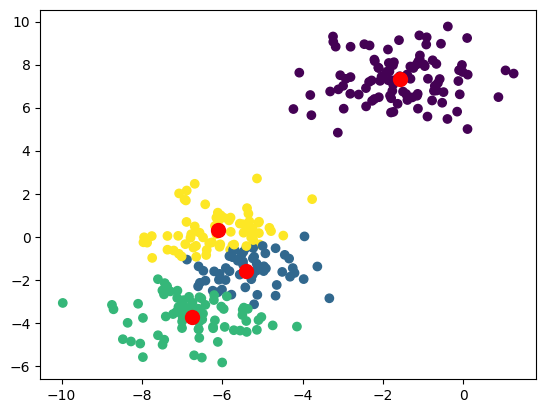

In [63]:
plt.scatter(X[:,0], X[:,1], c=k_means_optimal.best_estimator_.labels_)
plt.scatter(k_means_optimal.best_estimator_.cluster_centers_[:,0], k_means_optimal.best_estimator_.cluster_centers_[:,1], s=100, c='red')

In [74]:
from scipy.spatial.distance import cdist

In [69]:
from sklearn.metrics.cluster import rand_score

rand_score(k_means_optimal.best_estimator_.labels_, y)

0.888494983277592

In [70]:
from sklearn.metrics.cluster import adjusted_rand_score

adjusted_rand_score(k_means_optimal.best_estimator_.labels_, y)

0.7337283100969445

In [71]:
from sklearn.metrics import silhouette_score

silhouette_score(X, k_means_optimal.best_estimator_.labels_)

0.5013611731196769

In [72]:
from sklearn.metrics.cluster import davies_bouldin_score
davies_bouldin_score(X, k_means_optimal.best_estimator_.labels_)

0.7793777887915342